 # Función de correlación para distribuciones de puntos aleatorios en un circulo y una esfera

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

### Estimadores de la función de correlación

Estimador de Peebles-Hauser 

$\xi_{PH}^2 = \frac{1}{N_{est}^2}\frac{DD(r)}{RR(r)} - 1$

Estimador de Davis-Peebles 

$\xi_{PH}^2 = \frac{1}{N_{est}}\frac{DD(r)}{DR(r)} - 1$

Estimador de Correlacion Hamilton 

$\xi_{H}^{2} = \frac{DD(r)RR(r)}{(DR(r))^{2}}$

Estimador de Correlación Landy-Szalay 

$\xi_{LZ}^2 = 1+\frac{1}{N_{est}^2}-\frac{1}{N_{est}}\frac{2DR(r)}{RR(r)}  $

In [2]:
# Estimadores 

def peebles(ND,NR,DD,RR):
    ND = ND*1.
    NR = NR*1.
    Nest2 = ND*(ND-1)/(NR*(NR-1))
    return (1/Nest2)*(DD/RR)-1

def davis(ND,NR,DD,DR):
    ND = ND*1.
    NR = NR*1.
    Nest2 = ND*(ND-1)/(NR*(NR-1))
    return (1/Nest2)**0.5*(DD/DR)-1

def hamilton(DD,RR,DR):
    return (DD*RR)/(DR)**2

def landy(ND,NR,DD,RR,DR):
    ND = ND*1.
    NR = NR*1.
    Nest2 = ND*(ND-1)/(NR*(NR-1))
    return 1+DD/RR*Nest2-2*DR/RR*Nest2**.5



In [3]:
# Función con lo que se obtiene la distancia entre los puntos de la distribución

# Input values: N dimension, D son los datos, R datos random, bins los intervalos, tipo es DD,RR,DR
def distancia(N,D,R,bins,tipo):
    
    if (tipo == 'DD' or tipo == 'RR'):
        # Form the periodic distance array
        dist = D[:,None] - D[...,None] # resta todas las combinaciones y los almacena en dos matrices una para cada renglon
        dist = (dist**2).sum(axis=0)**.5 # axis=0, asegura que use los datos de cada renglon, y no las columnas. Devuelve una matriz triangular
        dist = dist[np.triu_indices(N, k = 1)] # extrae el tringulo superior (puede ser el inferior pq es simetrica), hay q especificar el número N
    
    if tipo == 'DR':
        dist = D[:,None] - R[...,None]
        dist = (dist**2).sum(axis=0)**.5
        dist = dist.flatten() # Regresa las frecuencias en un arreglo de 1 dimensión
        
    #Histograma
    
    count, bins, ignored_D = plt.hist(dist,bins = bins,color='purple',edgecolor = 'black',  linewidth=1)
    plt.title('Histograma de distancias datos %s'%tipo)
    plt.legend()
    plt.show()
    return dist, count # Regresa laS distancias, y las frecuencias del histograma

In [4]:
# Función con lo que se obtiene una distribución uniforme de un círculo

# Input values: dim es la dimension del circulo, r es el radio, N numero de puntos
def circle(dim,r,N):
    circle = []
    i=0
    # Ciclo que obtiene N puntos dentro de un circulo o esfera
    while i<N:
        point = np.random.random(dim)*2*r-r # Se crea el punto
        r_test = (point**2).sum(axis=0)**.5 
        # Se guarda el punto si el punto esta dentro de el circulo
        if r_test <= r:
            circle.append(point)
            i+=1
    circle = np.array(circle)
    circle = circle.T
    return circle # Regresa los punos dentro del circulo

In [5]:
def caja(dim,L,N):
    return np.random.random((dim, N))*L-0.5*L
   # Regresa los datos D, la distancias, y las frecuenciass



## Disco en 2D

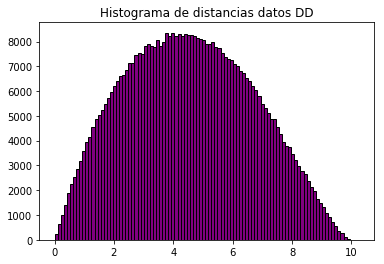

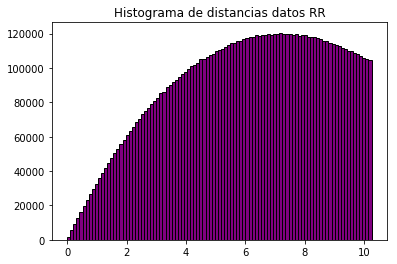

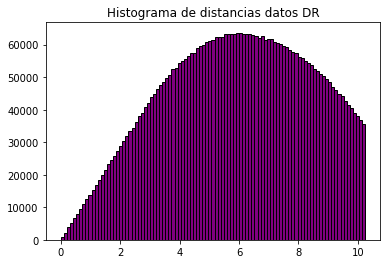

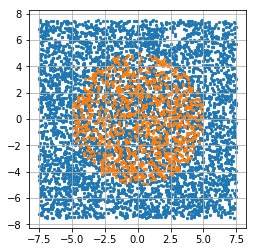

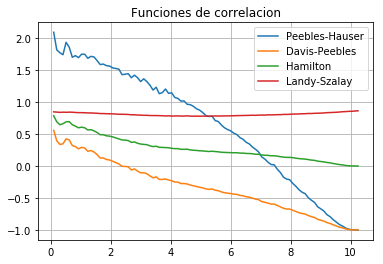

In [7]:
# Obtener los puntos dentro del circulo
dim,ND,NR,r,L = 2,1000,5000,5.,15
#bins = np.linspace(0,L*2**.5,100)
bins = np.linspace(0,2.05*r,100)
#bins =20
# Datos
D = circle(dim,r,ND) 
dist_DD,DD = distancia(ND,D,None,bins,'DD')
x_D,y_D = D # obtenemos valores de x y y de D

# Random 
R = caja(dim,L,NR) 
dist_RR,RR = distancia(NR,R,None,bins,'RR')
x_R,y_R = R 

# DD-RR
dist_DDRR,DDRR = distancia(None,D,R,bins,'DR')

plt.clf()
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x_R,y_R,s=5)
ax.scatter(x_D,y_D,s=5)
ax.grid()
plt.show()


# Comparando las tres funciones de correlacion
PH = peebles(ND,NR,DD,RR)
D = davis(ND,NR,DD,DDRR)
H = hamilton(DD,RR,DDRR)
LS = landy(ND,NR,DD,RR,DDRR)
plt.clf()
plt.plot(bins[1:],PH,label= 'Peebles-Hauser')
plt.plot(bins[1:],D,label= 'Davis-Peebles')
plt.plot(bins[1:],H,label= 'Hamilton')
plt.plot(bins[1:],LS,label= 'Landy-Szalay')
plt.title('Funciones de correlacion')
plt.grid()
plt.legend()
plt.show()


# Esfera 3D

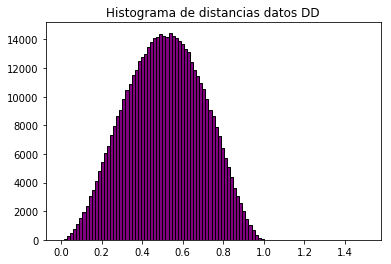

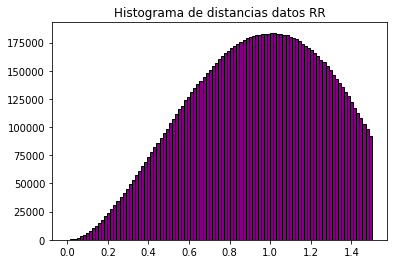

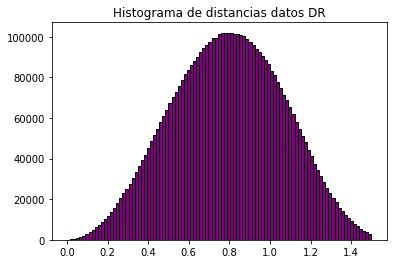

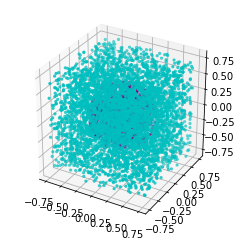

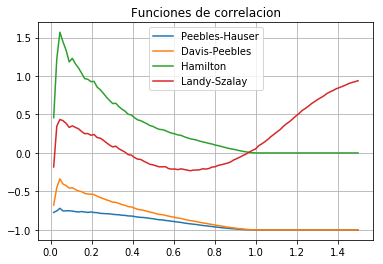

In [21]:
# Obtener los puntos dentro del circulo
dim,ND,NR,r,L = 3,1000,50000,.5,1.5
bins = np.linspace(0,L,100)

# Datos
D = circle(dim,r,ND) 
dist_DD,DD = distancia(ND,D,None,bins,'DD')
x_D,y_D,z_D = D # obtenemos valores de x y y de D

# Random 
R = caja(dim,L,NR) 
dist_RR,RR = distancia(NR,R,None,bins,'RR')
x_R,y_R,z_R = R 

# DD-RR
dist_DDRR,DDRR = distancia(None,None,D,R,bins,'DR')

fig = plt.figure()
cx = fig.add_subplot(111, projection='3d')
cx.set_aspect('equal')
cx.scatter(x_D,y_D,z_D,s=5,color='purple')
cx.scatter(x_R,y_R,z_R,s=5,color='c')
cx.grid()
plt.show()


# Comparando las tres funciones de correlacion
PH = peebles(DD,RR)
D = davis(DD,DDRR)
H = hamilton(DD,RR,DDRR)
LS = landy(DD,RR,DDRR)
plt.clf()
plt.plot(bins[1:],PH,label= 'Peebles-Hauser')
plt.plot(bins[1:],D,label= 'Davis-Peebles')
plt.plot(bins[1:],H,label= 'Hamilton')
plt.plot(bins[1:],LS,label= 'Landy-Szalay')
plt.title('Funciones de correlacion')
plt.grid()
plt.legend()
plt.show()


